K=2: Original Size = 12288 bytes, Avg Compressed Size = 4096.0 bytes, Compression Rate = 0.3333333333333333
K=4: Original Size = 12288 bytes, Avg Compressed Size = 4096.0 bytes, Compression Rate = 0.3333333333333333
K=8: Original Size = 12288 bytes, Avg Compressed Size = 4096.0 bytes, Compression Rate = 0.3333333333333333
K=16: Original Size = 12288 bytes, Avg Compressed Size = 4096.0 bytes, Compression Rate = 0.3333333333333333
K=32: Original Size = 12288 bytes, Avg Compressed Size = 4096.0 bytes, Compression Rate = 0.3333333333333333
K=64: Original Size = 12288 bytes, Avg Compressed Size = 4096.0 bytes, Compression Rate = 0.3333333333333333


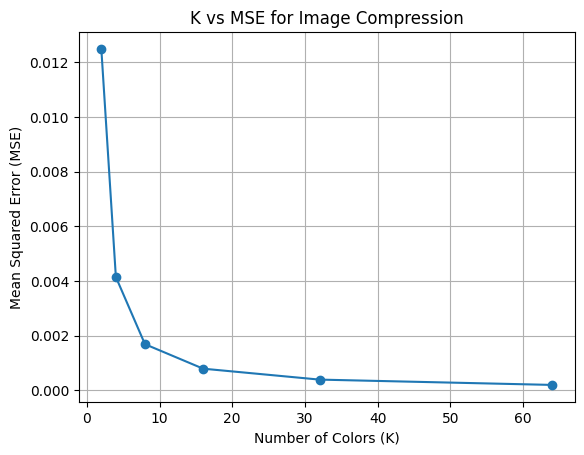

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

def compress_image(img, n_colors=16):
    h, w, c = img.shape
    flat_img = img.reshape(-1, 3)

    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(flat_img)
    compressed_flat = kmeans.cluster_centers_[kmeans.labels_]

    # Calculate the size of the compressed image (in bytes)
    compressed_img = compressed_flat.reshape(h, w, c) # 4 bytes per index for K-means (typically 4 bytes for an integer)
    compressed_size = h * w * 4

    return compressed_img, compressed_size

def evaluate_mse(images, n_colors_list, num_samples=1000):
    mse_results = []

    for k in n_colors_list:
        total_mse = 0
        total_compressed_size = 0
        for i in range(num_samples):
            original = images[i]
            original_size = original.size * original.itemsize
            compressed_img, compressed_size = compress_image(original, n_colors=k)
            mse = mean_squared_error(original.reshape(-1, 3), compressed_img.reshape(-1, 3))
            total_mse += mse
            total_compressed_size += compressed_size

        avg_mse = total_mse / num_samples  # Average MSE for this value of K
        avg_compressed_size = total_compressed_size / num_samples # Average compressed size for this value of K
        mse_results.append((k, avg_mse))
        print(f"K={k}: Original Size = {original_size} bytes, Avg Compressed Size = {avg_compressed_size} bytes, Compression Rate = {avg_compressed_size/original_size}")

    return mse_results

n_colors_list = [2, 4, 8, 16, 32, 64]

mse_results = evaluate_mse(x_train, n_colors_list)

# Plot the results
ks, mse_values = zip(*mse_results)
plt.plot(ks, mse_values, marker='o')
plt.xlabel('Number of Colors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs MSE for Image Compression')
plt.grid(True)
plt.show()
